In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
df= pd.read_csv('listings_ca.csv')

In [21]:
dfn= df[['room_type','host_acceptance_rate','price','availability_365','review_scores_rating','review_scores_cleanliness','review_scores_communication','number_of_reviews']].copy()

In [22]:
dfna=pd.read_csv("lift_ca2.csv")
dfna=dfna.fillna(method="bfill")

In [23]:
dfna.head()

,room_type,host_acceptance_rate,price,availability_365,review_scores_rating,review_scores_cleanliness,review_scores_communication,number_of_reviews
0,2,0.95,259.0,239.0,4.40,4.60,4.80,5
1,2,0.99,279.0,0.0,4.23,4.43,4.58,0
2,1,0.99,264.0,1.0,4.23,4.43,4.58,53
3,1,1.00,100.0,51.0,4.98,5.00,5.00,67
4,1,0.97,195.0,324.0,4.84,4.86,4.84,89


In [24]:
dfna=dfna.fillna(round(df.mean(),1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [25]:
valores_nulos=dfna.isnull().sum()
valores_nulos

room_type                      0
host_acceptance_rate           0
price                          0
availability_365               0
review_scores_rating           0
review_scores_cleanliness      0
review_scores_communication    0
number_of_reviews              0
dtype: int64

In [26]:
y=dfna[['availability_365','host_acceptance_rate','price','review_scores_rating','review_scores_cleanliness','review_scores_communication','number_of_reviews']]
x=dfna['room_type']
percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido availability_365               666.000
host_acceptance_rate             1.105
price                          444.000
review_scores_rating             5.295
review_scores_cleanliness        5.315
review_scores_communication      5.180
number_of_reviews              177.500
dtype: float64
Limite inferior permitido availability_365              -278.000
host_acceptance_rate             0.825
price                          -76.000
review_scores_rating             4.455
review_scores_cleanliness        4.475
review_scores_communication      4.700
number_of_reviews              -98.500
dtype: float64


In [27]:
df3=y[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
df3

,availability_365,host_acceptance_rate,price,review_scores_rating,review_scores_cleanliness,review_scores_communication,number_of_reviews
0,239.0,0.95,259.0,NaN,4.60,4.80,5.0
1,0.0,0.99,279.0,NaN,NaN,NaN,0.0
2,1.0,0.99,264.0,NaN,NaN,NaN,53.0
3,51.0,1.00,100.0,4.98,5.00,5.00,67.0
4,324.0,0.97,195.0,4.84,4.86,4.84,89.0
...,...,...,...,...,...,...,...
4010,363.0,NaN,NaN,4.63,4.92,NaN,38.0
4011,0.0,1.00,118.0,5.00,4.67,5.00,3.0
4012,0.0,NaN,222.0,5.00,5.00,5.00,3.0
4013,20.0,NaN,NaN,4.92,5.00,5.00,13.0


In [28]:
df4=df3.copy()
df4=df4.fillna(round(df3.mean(),1))
df4=df4.assign(room_type=x)
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4015 entries, 0 to 4014
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   availability_365             4015 non-null   float64
 1   host_acceptance_rate         4015 non-null   float64
 2   price                        4015 non-null   float64
 3   review_scores_rating         4015 non-null   float64
 4   review_scores_cleanliness    4015 non-null   float64
 5   review_scores_communication  4015 non-null   float64
 6   number_of_reviews            4015 non-null   float64
 7   room_type                    4015 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 251.1 KB


In [29]:
Entire_home=df4[df4["room_type"] == 1]
Hotel_room=df4[df4["room_type"] == 3]
Private_room=df4[df4["room_type"] == 2]
Shared_room=df4[df4["room_type"] == 4]

## Entire home

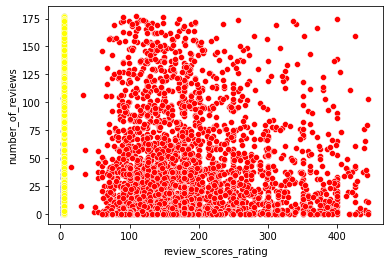

In [55]:
from turtle import color

sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=Entire_home)
sns.scatterplot(x='price', y='number_of_reviews', color="red", data=Entire_home)
sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="yellow", data=Entire_home)

In [56]:
Vars_Indep= Entire_home[['review_scores_rating', 'price','review_scores_communication']]
Vars_dep=Entire_home["number_of_reviews"]

In [57]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [58]:
model.fit(X=Vars_Indep,y=Vars_dep)

LinearRegression()

In [59]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'price', 'review_scores_communication'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-17.59182465,  -0.0331861 , -23.36363771]),
 '_residues': 5803954.407372577,
 'rank_': 3,
 'singular_': array([4.74315220e+03, 7.52042127e+00, 3.16826206e+00]),
 'intercept_': 245.81876248579698}

In [60]:
model.score(Vars_Indep,Vars_dep)

0.010128732815515407

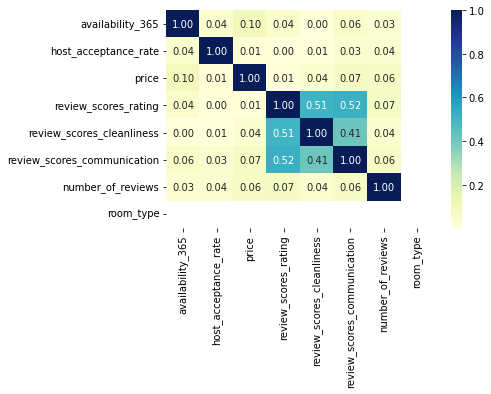

In [61]:
Corr_Factors=Entire_home.corr()
Corr_Factors1= abs(Corr_Factors)
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

## Hotel room 

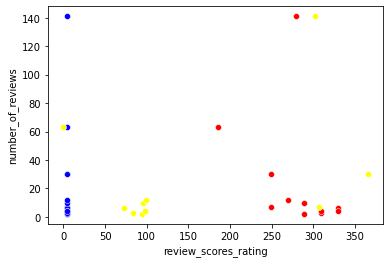

In [65]:
from turtle import color

sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="blue", data=Hotel_room)
sns.scatterplot(x='price', y='number_of_reviews', color="red", data=Hotel_room)
sns.scatterplot(x='availability_365', y='number_of_reviews', color="yellow", data=Hotel_room)

In [66]:
Vars_Indep= Hotel_room[['review_scores_rating', 'price','availability_365']]
Vars_dep=Hotel_room["number_of_reviews"]

In [67]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [68]:
model.fit(X=Vars_Indep,y=Vars_dep)

LinearRegression()

In [69]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_rating', 'price', 'availability_365'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([88.59069659, -0.23253454,  0.10930176]),
 '_residues': 11241.707820005699,
 'rank_': 3,
 'singular_': array([375.88419681, 131.32195973,   0.55491714]),
 'intercept_': -348.01498811082604}

In [70]:
model.score(Vars_Indep,Vars_dep)

0.37178019701248344

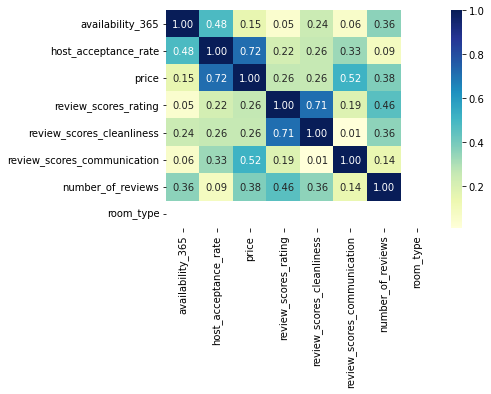

In [71]:
Corr_Factors=Hotel_room.corr()
Corr_Factors1= abs(Corr_Factors)
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

## Private room 

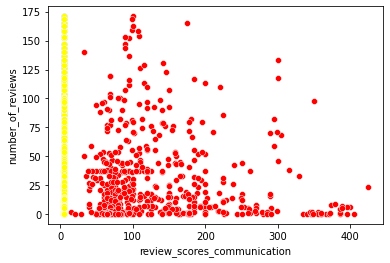

In [79]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="blue", data=Private_room)
sns.scatterplot(x='price', y='number_of_reviews', color="red", data=Private_room)
sns.scatterplot(x='review_scores_rating', y='number_of_reviews', color="yellow", data=Private_room)

In [43]:
Vars_Indep= Private_room[['review_scores_communication', 'price','review_scores_rating']]
Vars_dep=Private_room["number_of_reviews"]

In [44]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [45]:
model.fit(X=Vars_Indep,y=Vars_dep)

LinearRegression()

In [46]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication', 'price', 'review_scores_rating'],
       dtype=object),
 'n_features_in_': 3,
 'coef_': array([-35.07089538,  -0.03873661, -35.32489368]),
 '_residues': 676766.5096802352,
 'rank_': 3,
 'singular_': array([1.99710307e+03, 3.33524049e+00, 1.39874824e+00]),
 'intercept_': 380.20009107721876}

In [47]:
model.score(Vars_Indep,Vars_dep)

0.046131544901256705

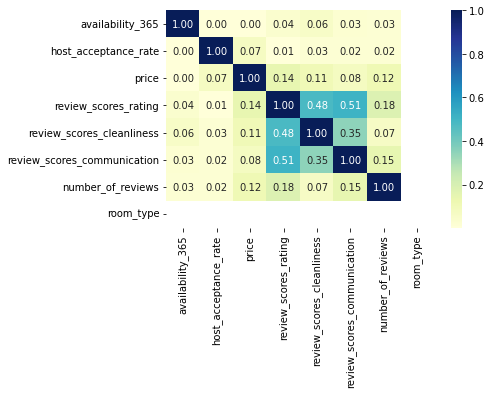

In [48]:
Corr_Factors=Private_room.corr()
Corr_Factors1= abs(Corr_Factors)
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map

## Shared room 

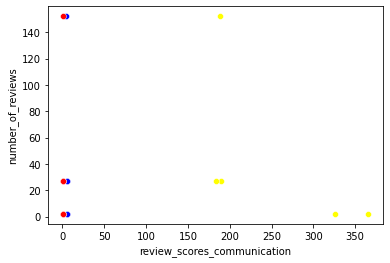

In [78]:
from turtle import color

sns.scatterplot(x='review_scores_communication', y='number_of_reviews', color="blue", data=Shared_room)
sns.scatterplot(x='host_acceptance_rate', y='number_of_reviews', color="red", data=Shared_room)
sns.scatterplot(x='availability_365', y='number_of_reviews', color="yellow", data=Shared_room)

In [72]:
Vars_Indep= Shared_room[['review_scores_communication', 'host_acceptance_rate','availability_365']]
Vars_dep=Shared_room["number_of_reviews"]

In [73]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [74]:
model.fit(X=Vars_Indep,y=Vars_dep)

LinearRegression()

In [75]:
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_communication', 'host_acceptance_rate',
        'availability_365'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-7.36921058e+02,  6.96647672e+02, -1.79038965e-01]),
 '_residues': 0.40107295035679236,
 'rank_': 3,
 'singular_': array([1.75844260e+02, 1.39574006e-01, 6.11405733e-03]),
 'intercept_': 2981.614735929095}

In [76]:
model.score(Vars_Indep,Vars_dep)

0.999974535050771

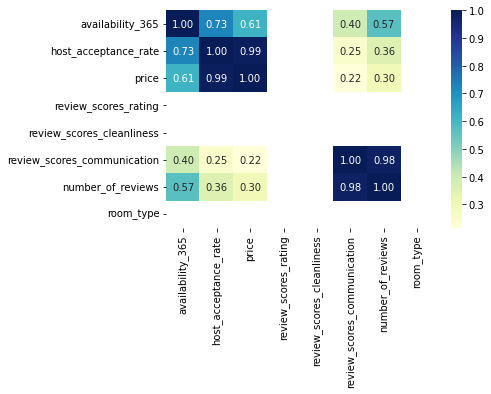

In [77]:
Corr_Factors=Shared_room.corr()
Corr_Factors1= abs(Corr_Factors)
Heat_Map= sns.heatmap(Corr_Factors1, cmap = 'YlGnBu', annot=True, fmt=".2f")  
Heat_Map